# Data Mining Challenge 2020

## Team
* Andrea Cappelletti 10529039
* Sandro Maglione 10532096

## Approch Summary
We split the analysis in multiple pipelined notebooks. Each notebook builds on top of the results of the analysis of the previous. We followed the canonical steps in the Data Mining process: Selection, Cleaning, Transformation, Mining, Validation, and Prediction. 

In [16]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Arrays and matrices
from datetime import datetime # Manipulating dates and times

# Data visualization
import matplotlib.pyplot as plt # Combine pyplot with numpy into a single namespace
import matplotlib as mpl
import seaborn as sns

# Same random numbers (debug mode)
np.random.seed(238746)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

# Inspect The Data
In this first phase we inspect the data and analyze all the value at our disposal.

In [17]:
# Open dataset from .csv file, with index column as date (first unnamed column in the file)
dataset = pd.read_csv('data/train.csv')
dataset['Unnamed: 0'] = dataset['Unnamed: 0'].str.replace('WE ', '', regex=False)
dataset['Unnamed: 0'] = pd.to_datetime(dataset['Unnamed: 0'])
dataset.rename(columns={'size (GM)': 'size', 'POS_exposed w-1': 'exposed', 'volume_on_promo w-1': 'promo', 'sales w-1': 'sales'}, inplace=True)
dataset.set_index('Unnamed: 0', inplace=True)
dataset.rename_axis('date', inplace=True)
dataset

,sku,pack,size,brand,price,exposed,promo,sales,scope,target
date,,,,,,,,,,
2016-12-10,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0
2016-12-17,2689,SINGLE,395.41,BRAND1,1.15,1.0,17.676112,24175.0,0,23521.0
2016-12-24,2689,SINGLE,395.41,BRAND1,1.16,1.0,24.482803,23521.0,0,22075.0
2016-12-31,2689,SINGLE,395.41,BRAND1,1.16,0.0,19.410646,22075.0,0,16492.0
2017-01-07,2689,SINGLE,395.41,BRAND1,1.16,0.0,29.812030,16492.0,0,25971.0
...,...,...,...,...,...,...,...,...,...,...
2019-05-25,2683,MULTI,105.44,BRAND1,1.58,0.0,81.249322,14760.0,0,13696.0
2019-06-01,2683,MULTI,105.44,BRAND1,1.64,0.0,92.031250,13696.0,0,14195.0
2019-06-08,2683,MULTI,105.44,BRAND1,1.66,0.0,35.144769,14195.0,0,16071.0


In [18]:
# Inspect dataset by date index
dataset.sort_index().head()

,sku,pack,size,brand,price,exposed,promo,sales,scope,target
date,,,,,,,,,,
2016-12-10,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0
2016-12-10,2712,SINGLE,395.41,BRAND1,1.15,NaN,NaN,NaN,0,16052.0
2016-12-10,1356,MULTI,87.87,BRAND3,1.24,NaN,NaN,NaN,0,12467.0
2016-12-10,2249,SINGLE,395.41,BRAND5,1.60,NaN,NaN,NaN,0,8507.0
2016-12-10,546,SINGLE,114.23,BRAND2,0.52,NaN,NaN,NaN,1,76232.0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5719 entries, 2016-12-10 to 2019-06-22
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sku      5719 non-null   int64  
 1   pack     5719 non-null   object 
 2   size     5719 non-null   float64
 3   brand    5719 non-null   object 
 4   price    5719 non-null   float64
 5   exposed  5676 non-null   float64
 6   promo    5676 non-null   float64
 7   sales    5676 non-null   float64
 8   scope    5719 non-null   int64  
 9   target   5719 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 491.5+ KB


In [20]:
dataset.describe()

,sku,size,price,exposed,promo,sales,scope,target
count,5719.000000,5719.000000,5719.000000,5676.000000,5676.000000,5676.000000,5719.000000,5719.000000
mean,1797.255814,245.581860,1.190622,2.909796,31.327102,50877.853946,0.279070,50834.613569
std,784.923142,192.704161,0.697537,8.498269,36.538638,94545.768566,0.448581,94505.550714
min,144.000000,87.870000,0.300000,0.000000,0.000000,813.000000,0.000000,813.000000
25%,1065.000000,114.230000,0.560000,0.000000,0.972649,12464.500000,0.000000,12463.000000
50%,1618.000000,131.800000,1.080000,0.000000,18.484134,22093.000000,0.000000,22076.000000
75%,2682.000000,395.410000,1.610000,2.000000,43.345864,46570.000000,1.000000,46555.000000
max,2718.000000,878.680000,3.890000,70.000000,100.066205,714202.000000,1.000000,714202.000000


## Filling Missing Values
Some values are missing (Nan). Therefore we fill them using the next row of the same SKU in time.

In [21]:
# Count number of NaN for each column
dataset.isna().sum()

sku         0
pack        0
size        0
brand       0
price       0
exposed    43
promo      43
sales      43
scope       0
target      0
dtype: int64

As we can see from the following table, the missing values are all in the first week of our dataset.

In [22]:
nanDataset = dataset[dataset.isna().any(axis=1)]
nanDataset

,sku,pack,size,brand,price,exposed,promo,sales,scope,target
date,,,,,,,,,,
2016-12-10,2689,SINGLE,395.41,BRAND1,1.16,NaN,NaN,NaN,0,24175.0
2016-12-10,1027,SINGLE,114.23,BRAND2,0.52,NaN,NaN,NaN,1,54158.0
2016-12-10,2696,SINGLE,395.41,BRAND1,1.14,NaN,NaN,NaN,0,14100.0
2016-12-10,2698,SINGLE,395.41,BRAND1,1.13,NaN,NaN,NaN,0,5591.0
2016-12-10,1035,SINGLE,114.23,BRAND2,0.51,NaN,NaN,NaN,1,41870.0
2016-12-10,144,MULTI,114.23,BRAND2,2.18,NaN,NaN,NaN,1,51320.0
2016-12-10,2704,SINGLE,878.68,BRAND1,2.50,NaN,NaN,NaN,0,20456.0
2016-12-10,1554,SINGLE,395.41,BRAND3,1.10,NaN,NaN,NaN,0,27880.0
2016-12-10,2705,SINGLE,131.80,BRAND1,0.51,NaN,NaN,NaN,0,81114.0


In [23]:
dataset = dataset.sort_values(by = ['sku', 'date'], ascending = [True, True]).fillna(method='bfill')
dataset

,sku,pack,size,brand,price,exposed,promo,sales,scope,target
date,,,,,,,,,,
2016-12-10,144,MULTI,114.23,BRAND2,2.18,45.0,100.000000,51320.0,1,51320.0
2016-12-17,144,MULTI,114.23,BRAND2,2.00,45.0,100.000000,51320.0,1,66431.0
2016-12-24,144,MULTI,114.23,BRAND2,2.05,17.0,100.000000,66431.0,1,57001.0
2016-12-31,144,MULTI,114.23,BRAND2,3.00,2.0,100.000000,57001.0,1,15052.0
2017-01-07,144,MULTI,114.23,BRAND2,2.99,2.0,28.534193,15052.0,1,22016.0
...,...,...,...,...,...,...,...,...,...,...
2019-05-25,2718,SINGLE,395.41,BRAND1,1.11,0.0,26.050480,33875.0,0,33328.0
2019-06-01,2718,SINGLE,395.41,BRAND1,1.30,1.0,43.099496,33328.0,0,22512.0
2019-06-08,2718,SINGLE,395.41,BRAND1,1.55,0.0,0.000000,22512.0,0,17461.0


In [24]:
# Count number of NaN for each column
dataset.isna().sum()

sku        0
pack       0
size       0
brand      0
price      0
exposed    0
promo      0
sales      0
scope      0
target     0
dtype: int64

## Brand
We first visualize the information about each brand in the dataset.

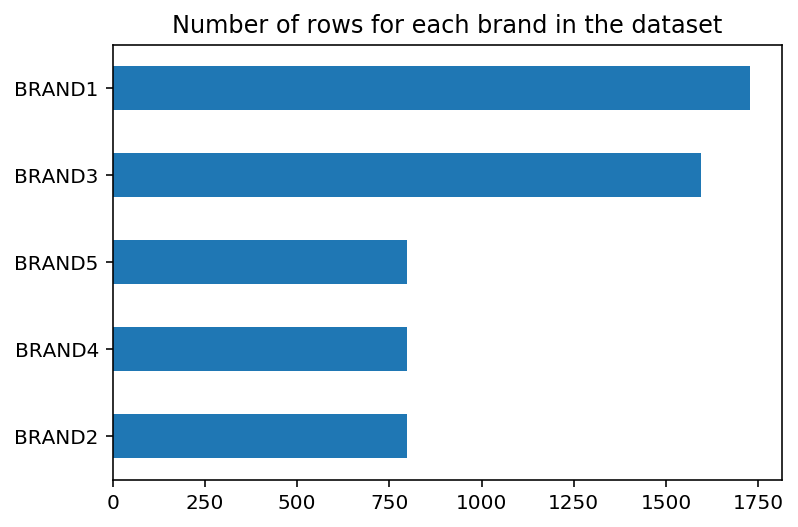

In [25]:
plt.title("Number of rows for each brand in the dataset")
dataset.brand.value_counts().sort_values().plot(kind = 'barh')

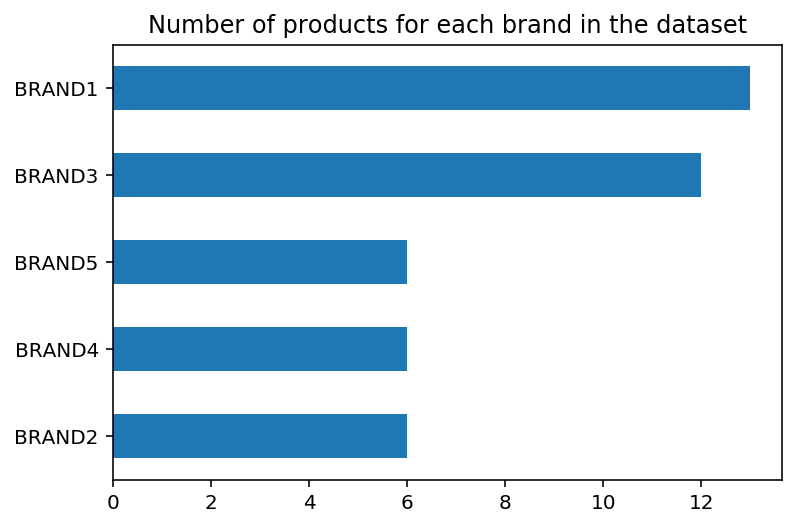

In [26]:
plt.title("Number of products for each brand in the dataset")
(dataset.brand.value_counts().sort_values() / 133).plot(kind = 'barh')

We plot the number of products in the scope for each brand, and we notice that the only brands in the scope are **BRAND4** and **BRAND2**, with **6 products** each.

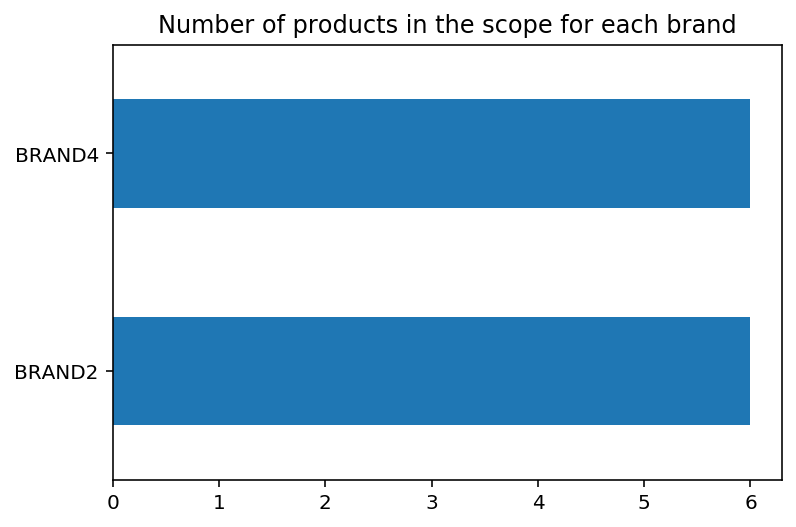

In [27]:
plt.title("Number of products in the scope for each brand")
(dataset[dataset.scope == 1].brand.value_counts().sort_values() / 133).plot(kind = 'barh')

In [28]:
dataset.to_csv('./data/step1.csv', index=True)